In [5]:
%matplotlib inline
import numpy as np
import pandas as pd
import os 
import seaborn as sns
import re as re

from matplotlib.widgets import LassoSelector
from matplotlib.path import Path
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.signal import argrelextrema
from scipy.signal import correlate

#For making videos from images
import cv2
import glob

from PIL import Image

#reloading modules
import importlib as il


from scipy.ndimage import median_filter

#Home made modules
import lasso_selector as ls
import MotorPAINT_postDoM as mp
import Rolling_window_projection_along_neurite as projection



In [11]:
il.reload(projection)

<module 'Rolling_window_projection_along_neurite' from 'C:\\Users\\Hanna\\scripts\\Rolling_window_projection_along_neurite.py'>

In [3]:
#neuron_mdf=pd.read_csv('C:/Users/Hanna/Documents/Master_thesis_data/2022_02_16_Motor_PAINT_Neurons_DIV2_Analysis/S03_C02/New_filtering_regime/Trail_02/Data_frame_neurites_labelled_Trail_02.csv')

In [2]:
neuron_mdf=pd.read_csv('C:/Users/Hanna/Documents/Master_thesis_data/2022_02_16_Motor_PAINT_Neurons_DIV2_Analysis_version2/S03_C02_ROI1/Data_frame_neurites_labelled_S03_C02_ROI1.csv')

In [3]:
path=os.getcwd()
path

'C:\\Users\\Hanna\\Documents\\Master_thesis_data\\Motor_PAINT'

In [114]:
path=os.getcwd()
if not os.path.isdir(path+r'\\videos'):
    os.mkdir(path+r'\\PNGs')
#os.chdir(path+r'\\videos')


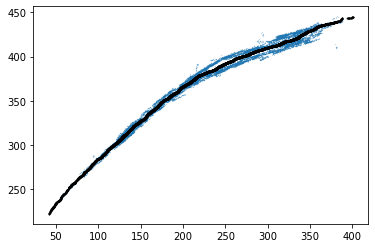

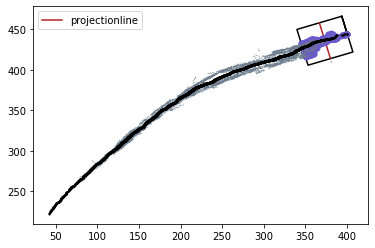

0


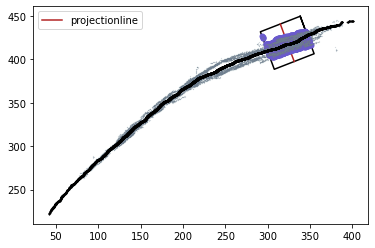

2


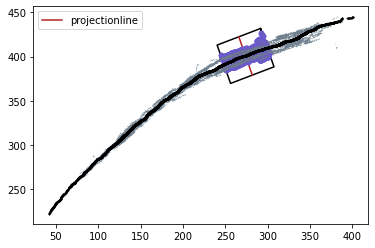

4


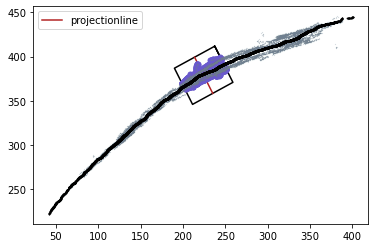

6


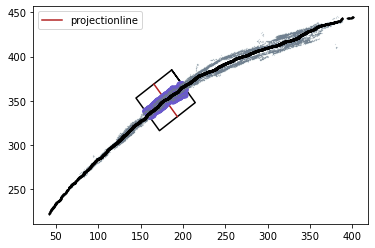

8


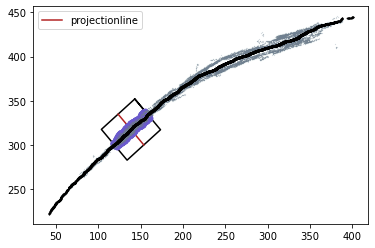

10


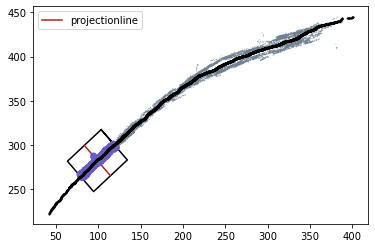

12


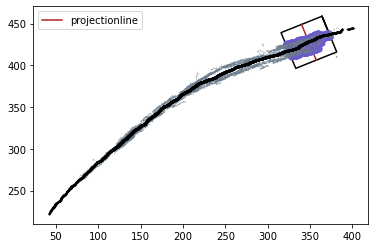

1


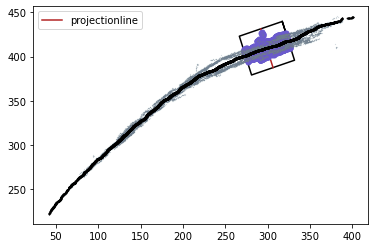

3


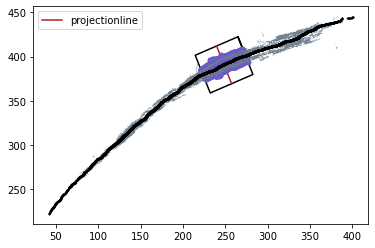

5


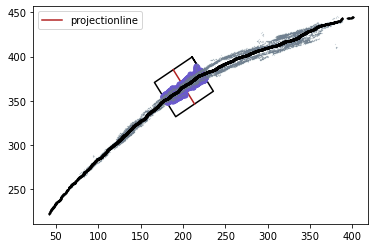

7


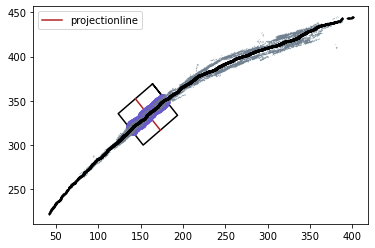

9


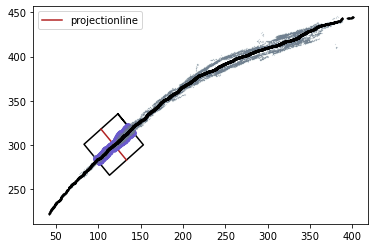

11


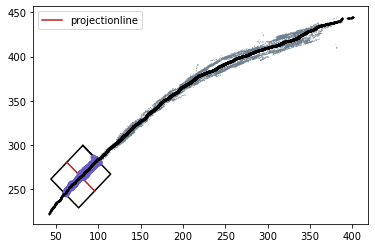

13
0.1980856303554738


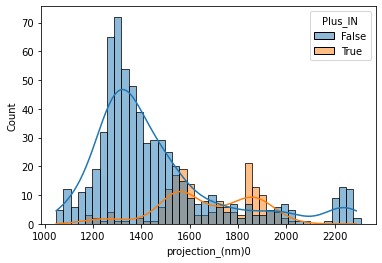

0.27257979127241294


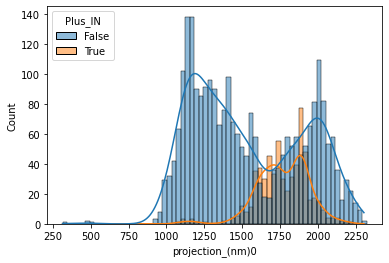

0.18176929313713436


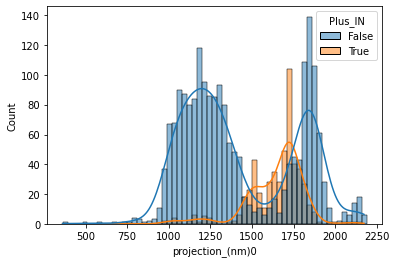

0.48270903763090584


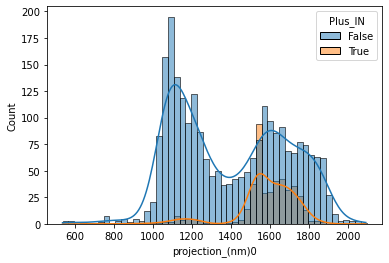

0.8511890826247893


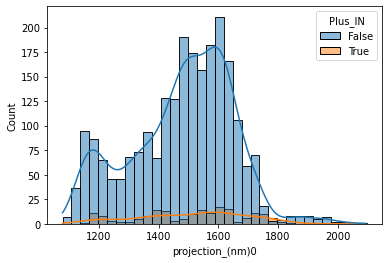

0.6759027530210592


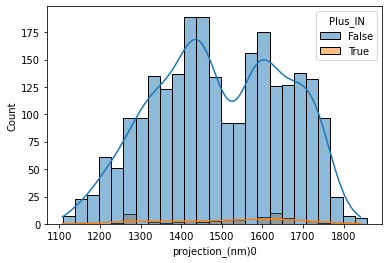

0.16922353119856812


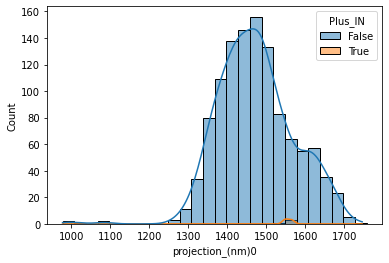

1081.9985706264374 and  997.1118764406818 were merged to 1039.5552235335597
0.28898129448374066


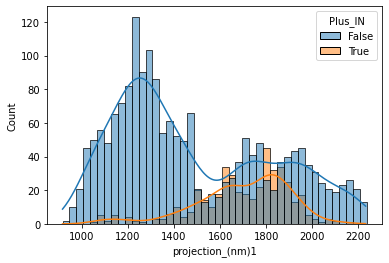

0.08783682366385065


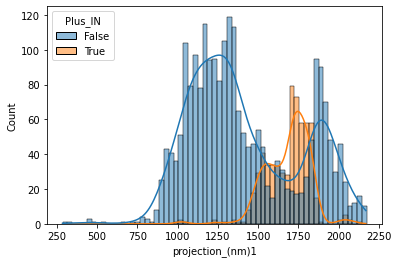

0.22850320393829618


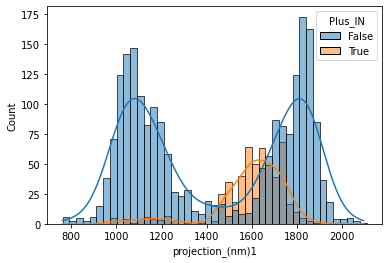

0.7066841197616469


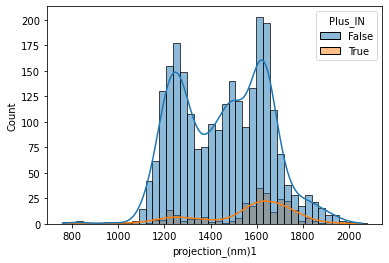

0.8520165022035339


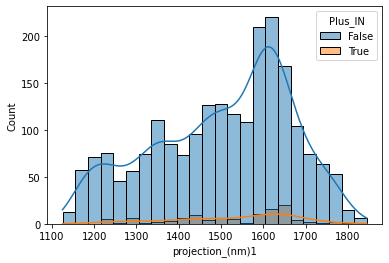

0.623054296724262


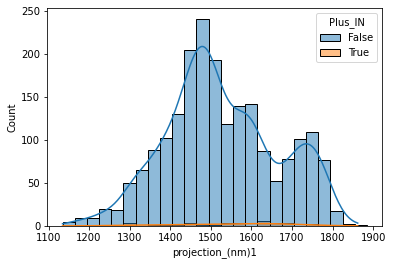

C:\Users\Hanna\anaconda3\lib\site-packages\numpy\lib\function_base.py:2642: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\Hanna\anaconda3\lib\site-packages\numpy\lib\function_base.py:2643: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


nan


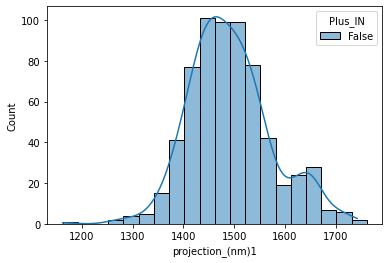

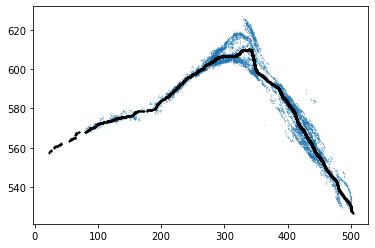

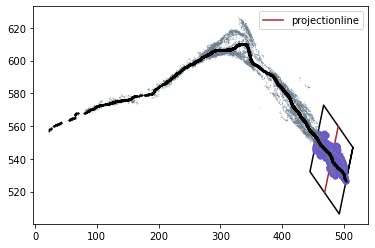

0


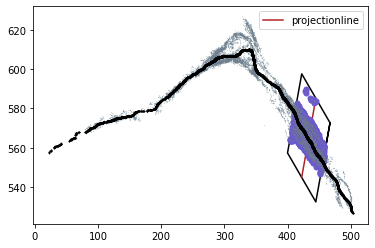

2


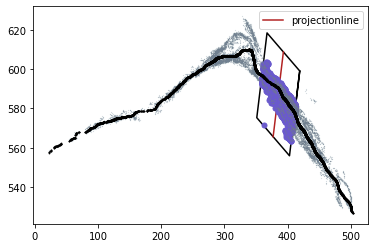

4


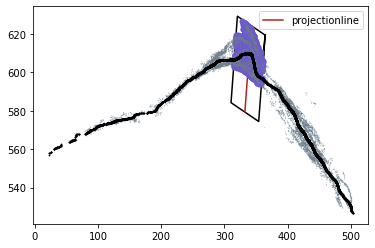

6


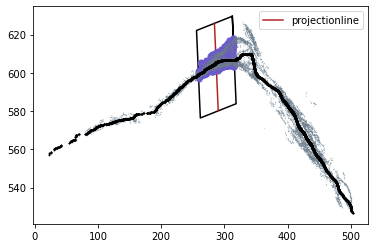

8


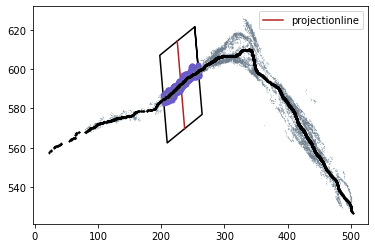

10


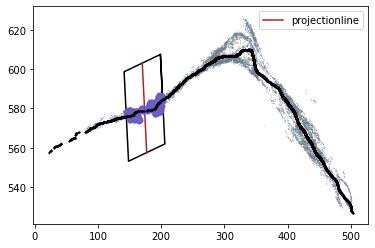

12


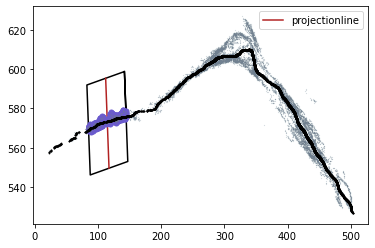

14


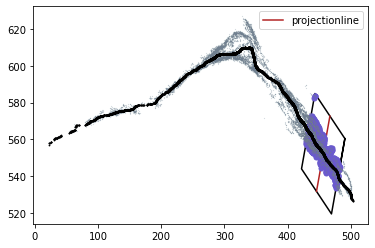

1


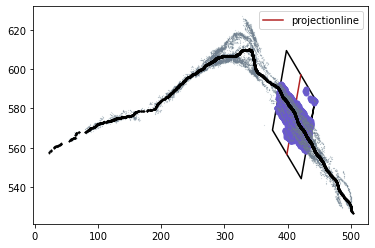

3


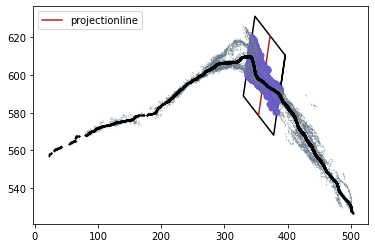

5


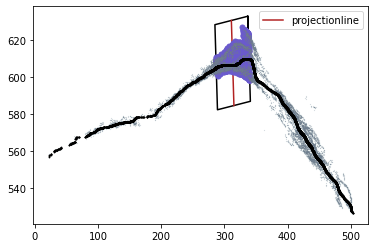

7


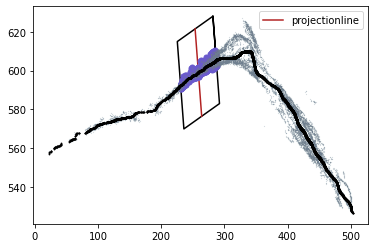

9


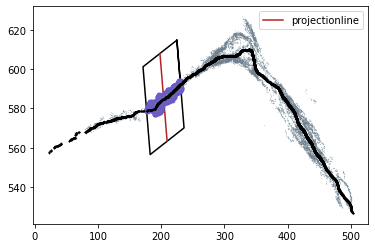

11


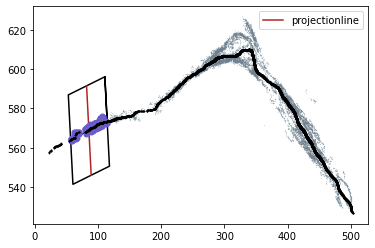

13
0.6576382240755982


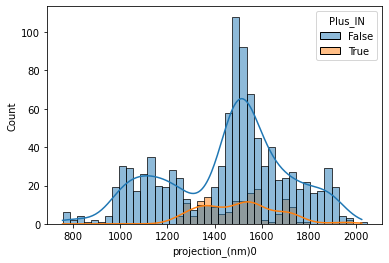

0.6389113045336567


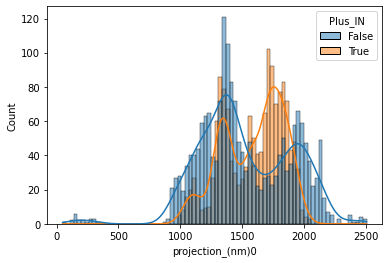

0.7968066460318942


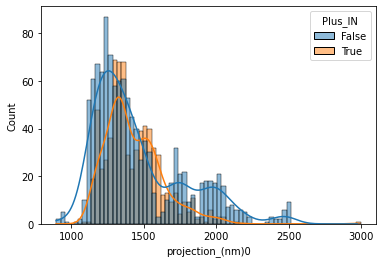

0.4157521749582963


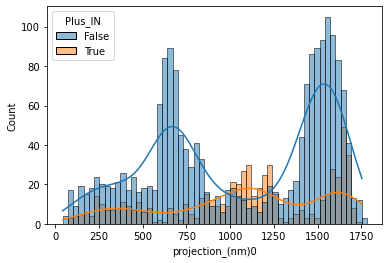

0.8638911383868363


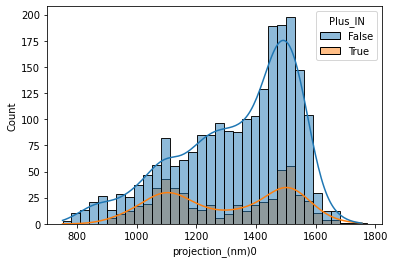

0.9138396553248802


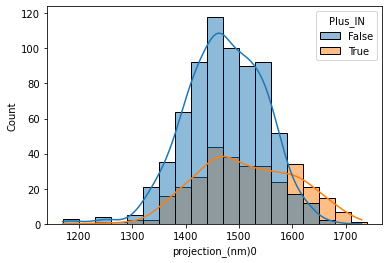

1253.8576779306313 and  1186.2971553281877 were merged to 1220.0774166294095
0.5432888926012605


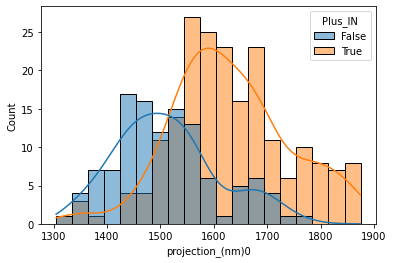

0.8635127248326028


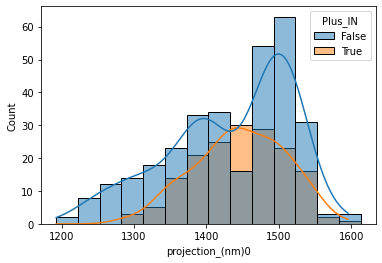

1500.3256417037662 and  1395.059313025963 were merged to 1447.6924773648648
0.7093449950895613


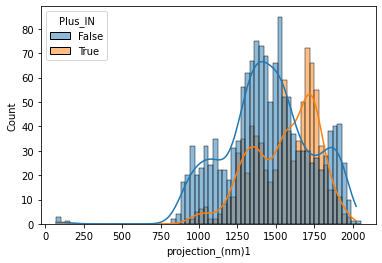

0.6479548203814882


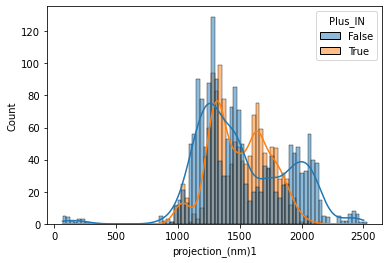

0.5447454673363856


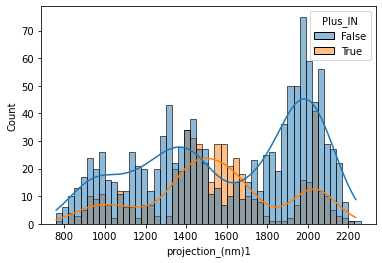

0.7270649535989084


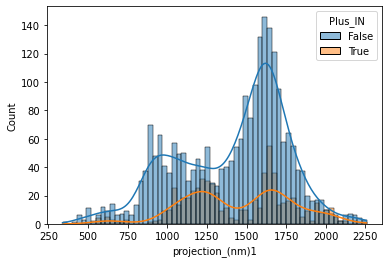

0.8957988600140444


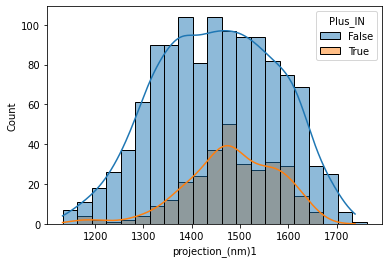

0.643239930780839


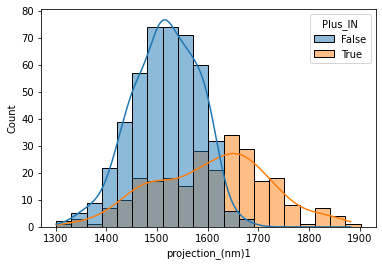

0.6527616576479107


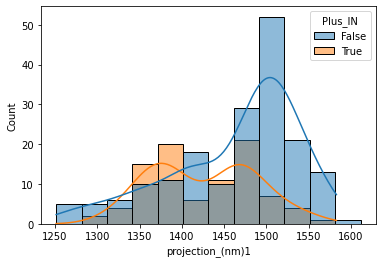

1467.776360104525 and  1376.1761657610423 were merged to 1422.80899197227


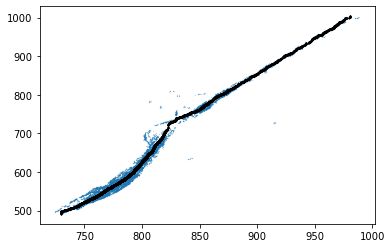

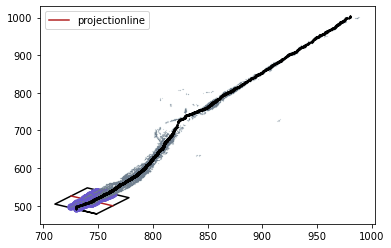

0


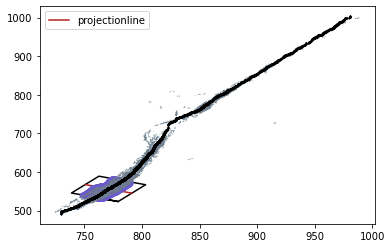

2


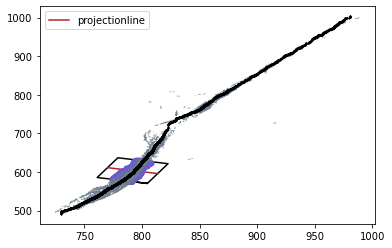

4


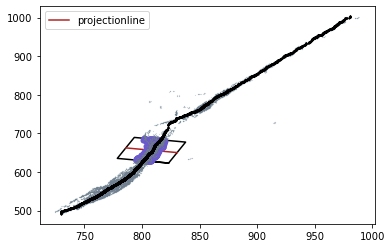

6


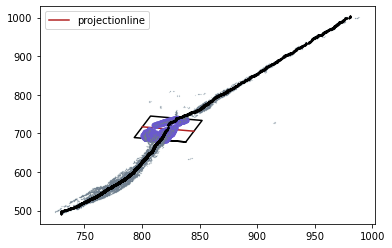

8


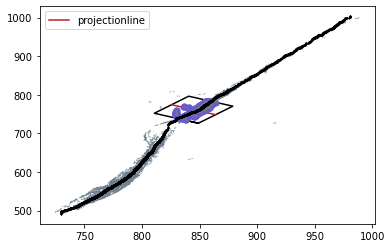

10


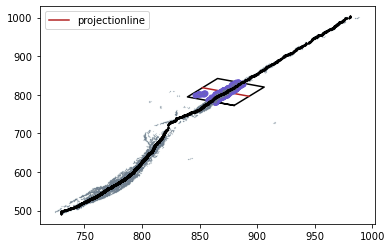

12


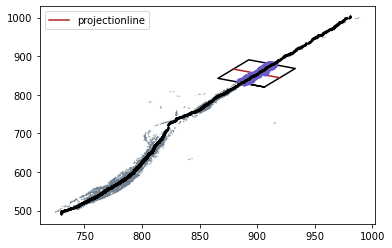

14


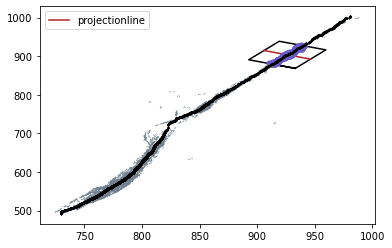

16


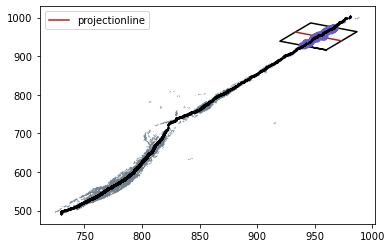

18


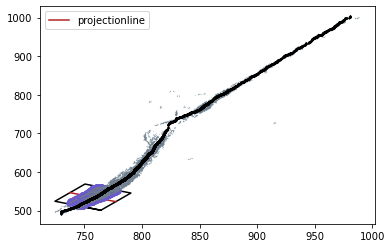

1


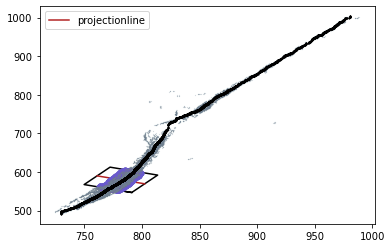

3


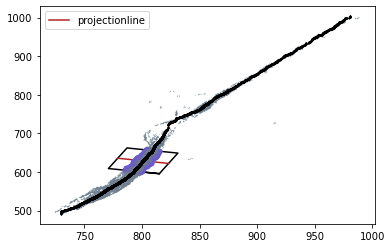

5


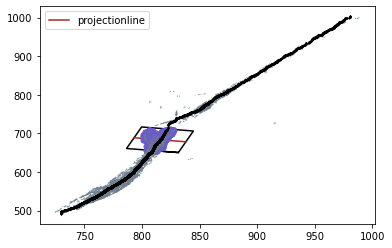

7


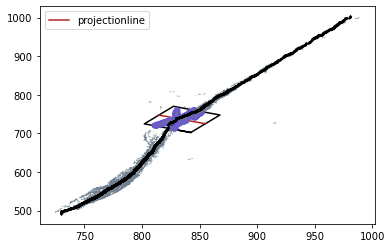

9


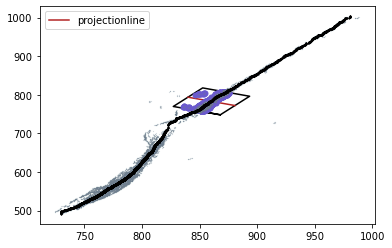

11


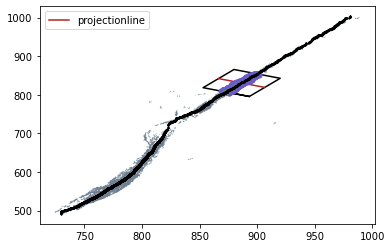

13


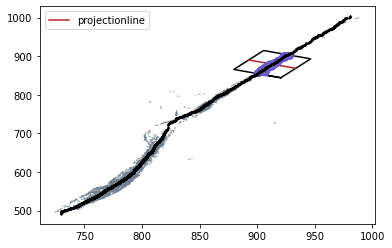

15


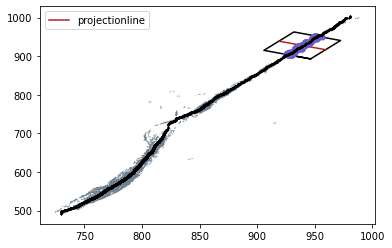

17
0.18912080240828336


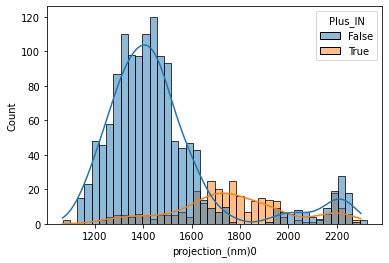

0.07331836411741258


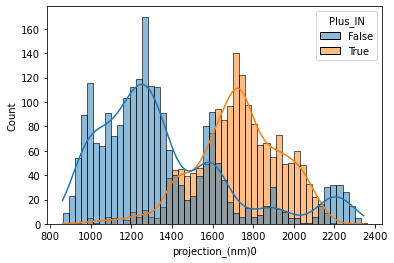

0.3885348060064633


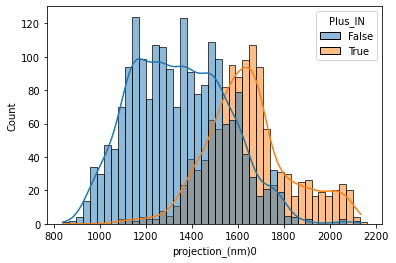

1248.6159334075326 and  1170.6276875963322 were merged to 1209.6218105019325
1463.0836093883336 and  1352.6002611557997 were merged to 1411.0914455142
0.3971001350976448


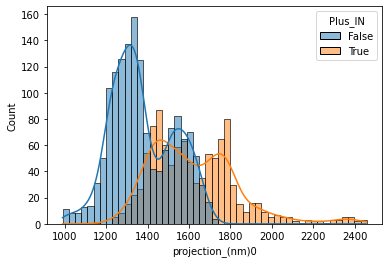

0.13046645190030878


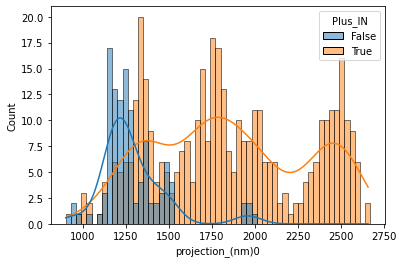

0.5821364040313051


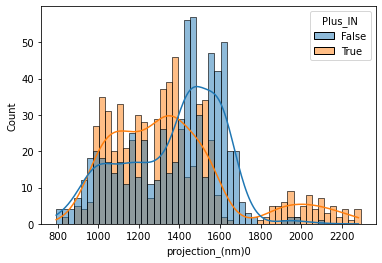

0.36141885951507946


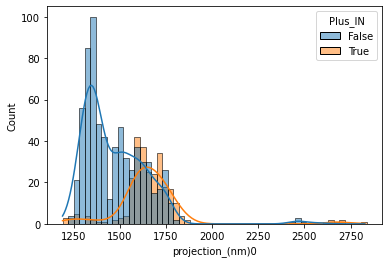

0.043418729990484906


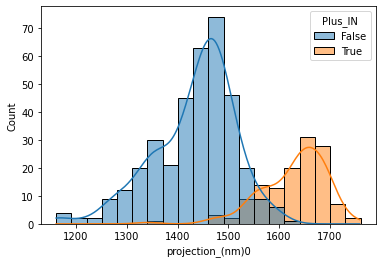

0.4720039892046239


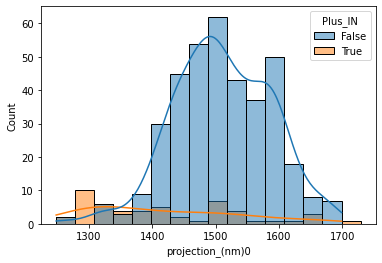

0.7831570979876691


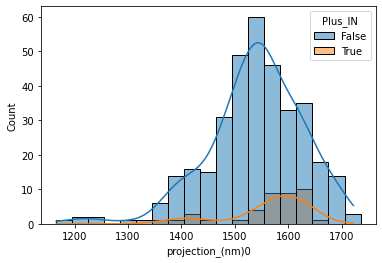

0.2485199769586567


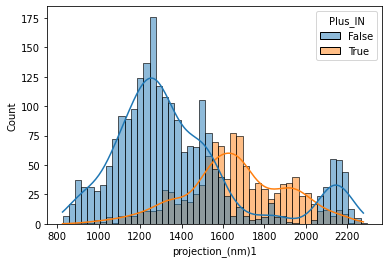

0.1261575528895518


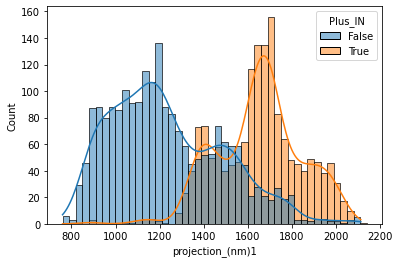

0.6856071533048597


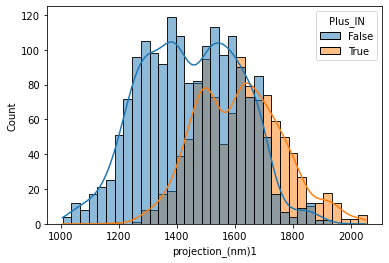

0.3007041987110181


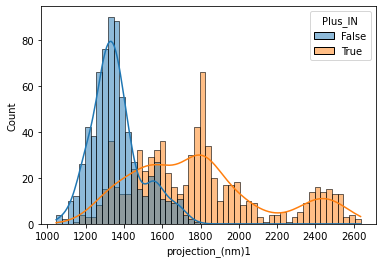

0.6989459366244833


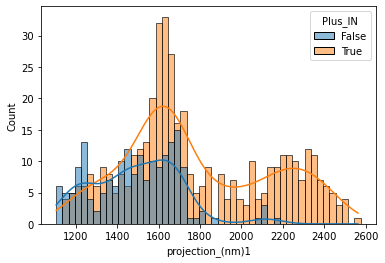

0.5938574189042911


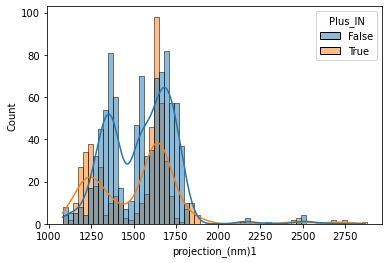

0.07106772188564504


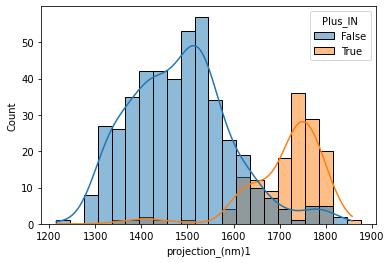

0.2840967099273331


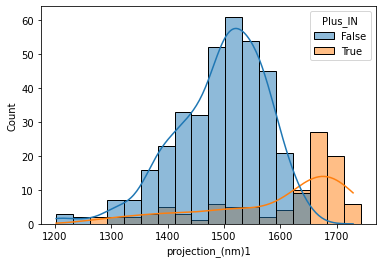

0.17617958487964822


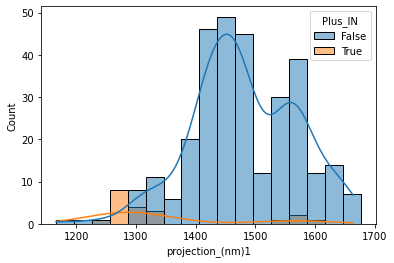

1558.5638906820054 and  1451.0647427505533 were merged to 1503.5643266240531


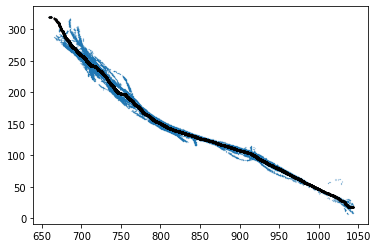

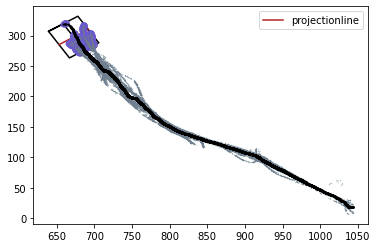

0


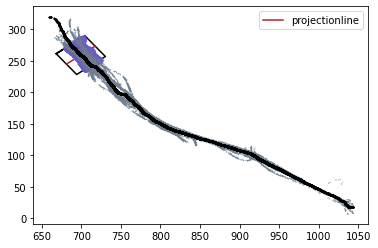

2


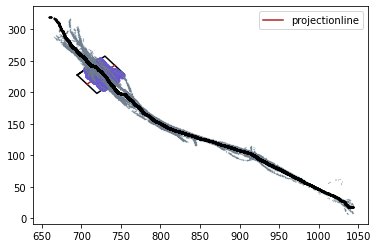

4


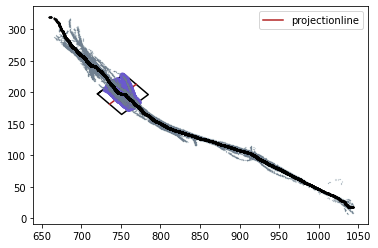

6


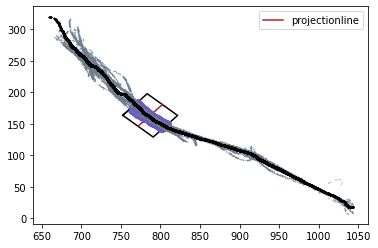

8


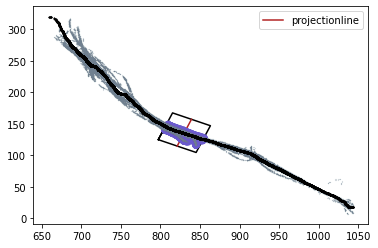

10


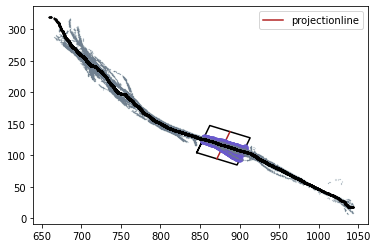

12


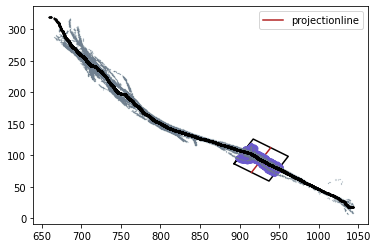

14


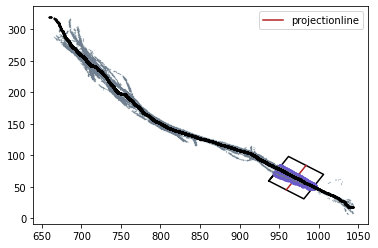

16


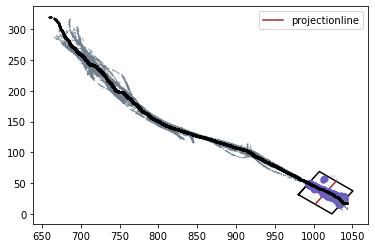

18


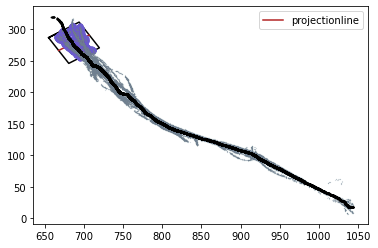

1


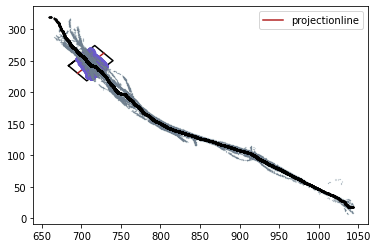

3


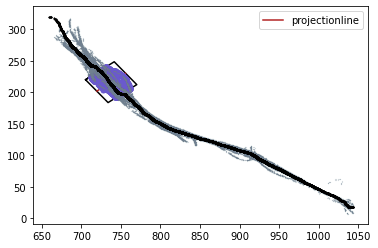

5


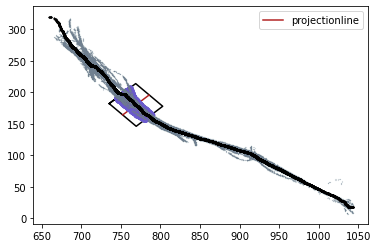

7


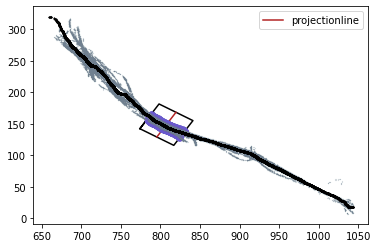

9


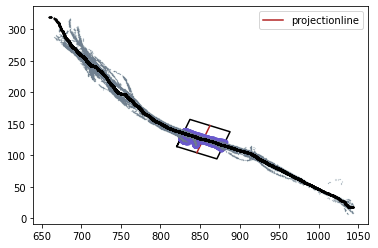

11


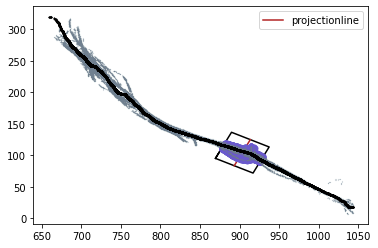

13


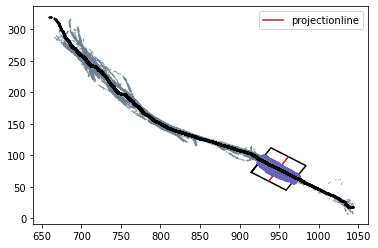

15


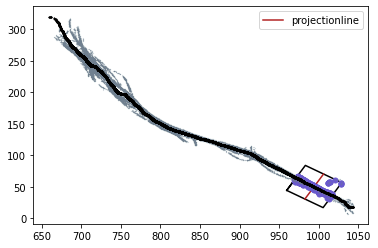

17
0.12271144642686407


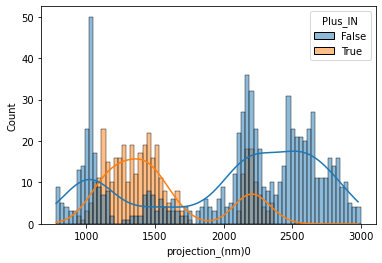

0.5194905259793441


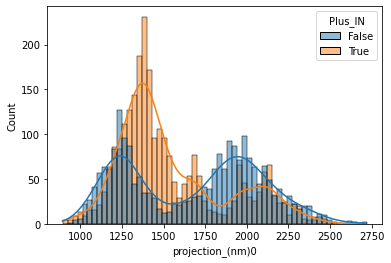

0.4386482446703618


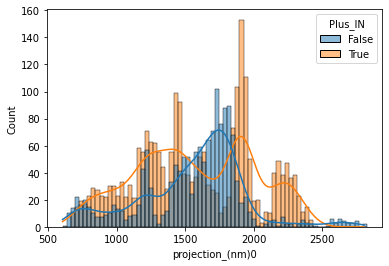

0.29422453533245013


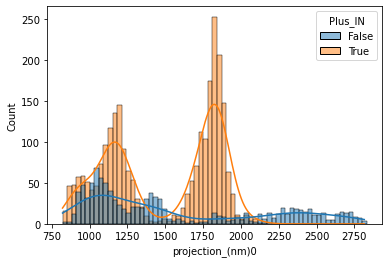

0.8404588473925204


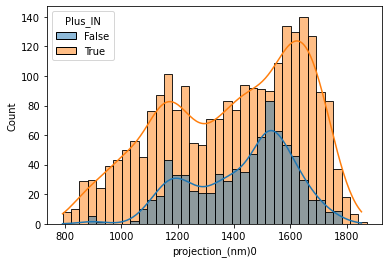

0.8112907419247516


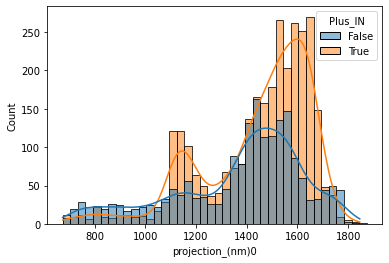

0.5461882897058609


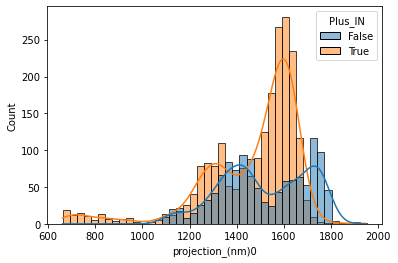

0.5012687477491978


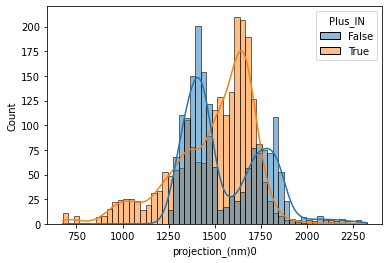

0.8799956014116725


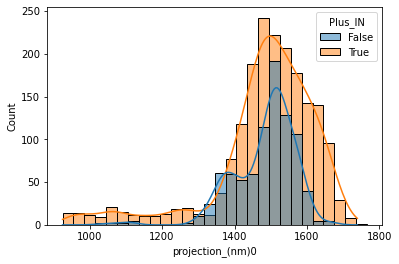

0.8592649515290816


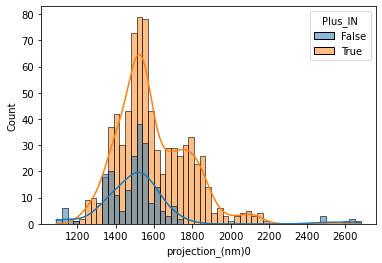

0.40457104810448546


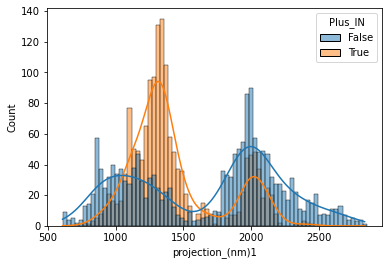

0.6770517458400063


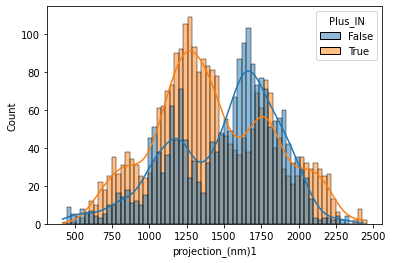

0.11888386676509878


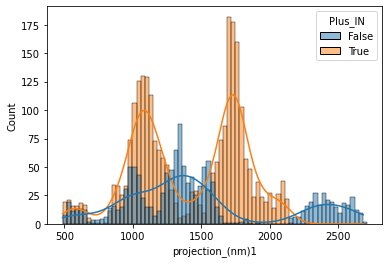

0.5744944562703814


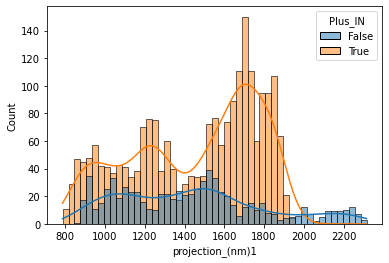

0.8778980645616979


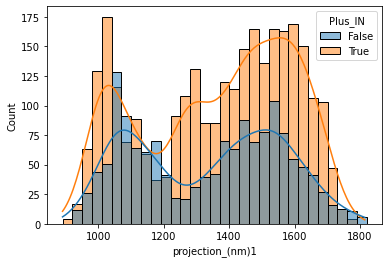

0.8107355248175597


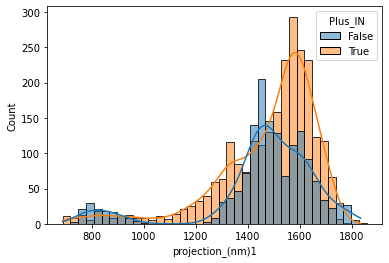

0.253041587710609


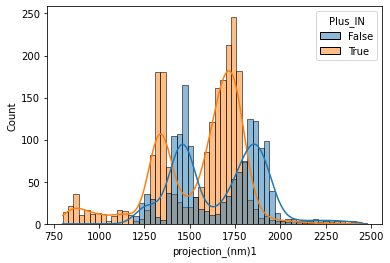

0.6079015838914298


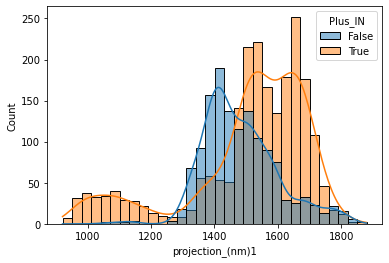

1643.1194616245834 and  1537.2186559674783 were merged to 1590.1690587960306
0.9019921078222527


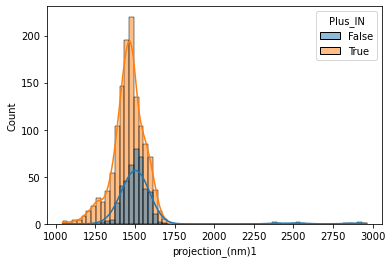

2518.3327176187195 and  2412.300124053948 were merged to 2460.4967574924804


In [58]:
%matplotlib inline
soma_coords = [(561.3045248637045, 450.74785503006)]
Neurites_dict = {}
window  = 4000 #window size in nm along median line

for i in range(1,neuron_mdf.Neurite_label.max()+1):
#for i in range(1,3):
    #Calculate the change in X and Y position, if the change in X position is more than the change in Y position use, the X as x-axis and give Y values to filter, otherwise swap this relationship
    changeX=neuron_mdf[neuron_mdf.Neurite_label==i]['X_(px)'].max()-neuron_mdf[neuron_mdf.Neurite_label==i]['X_(px)'].min()
    changeY=neuron_mdf[neuron_mdf.Neurite_label==i]['Y_(px)'].max()-neuron_mdf[neuron_mdf.Neurite_label==i]['Y_(px)'].min()
    
    #initiate class
    p=projection.projection_3()
    p.soma_coords = soma_coords
    p.i = i 
    p.overlap =1 #0, 1 or 2 for no overlap, 1/3
    
    if changeX/changeY>1: 
        p.change='X'
        # Make a sub dataframe for each neurite
        df=neuron_mdf[neuron_mdf.Neurite_label==i].sort_values(['X_(px)'])
        
        
    else: 
        p.change ='Y'
        #If the change in Y position is larger than change in Xposition use the X coordinates to detrmine the median
        df=neuron_mdf[neuron_mdf.Neurite_label==i].sort_values(['Y_(px)'])
        
    
    p.df=df.copy()
    p.define_neurite_axis()

    p.rollBy(basis=p.df['Distance_median_(nm)'], window=window,overlap_window=overlap)
   
    
    #calculate aggregate values over each window
    Neurites_dict[i] = statitics_per_neurite(nbins=100, bin_width =30)
       
    #for keys, data in p.stored_window.items():
        #plot_heat_maps(keys, data, df_stats=Neurites_dict[i],bin_width =30, store_fig= True)
        #plot_heat_maps_2(keys, data, df_stats=Neurites_dict[i],bin_width =30, store_fig= True)    
        #plot_hist(keys, data, df_stats=Neurites_dict[i], store_fig= True)        
 
    

In [120]:
window=4000
window_um = window/1000 #set window from nm in micrometers

In [121]:
 #Color palette for plotting
sns.set_palette('tab20')
current_palette=sns.color_palette()
palette=current_palette.as_hex()[0:2]

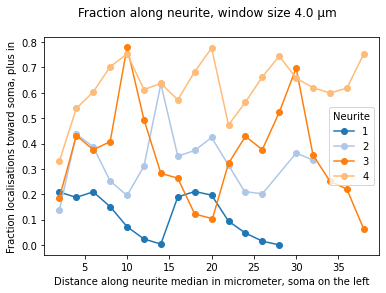

In [157]:
for key, data  in Neurites_dict.items():
    #Plot at middel of window
    #window in micormeters 
    x_values = round((data['Window_end'] - (data['Window_end'] - data['Window_start'])/2)/1000, 1).values
    x_values = np.sort(x_values)
    
    y = data['Plusin']/data['Total']
    plt.plot(x_values,y, '-o', label = key)
    plt.xlabel('Distance along neurite median in micrometer, soma on the left')
    plt.ylabel('Fraction localisations toward soma, plus in')
    plt.title(f'Fraction along neurite, window size {round(window_um, 1)} μm  \n')
plt.legend(title='Neurite')
plt.savefig(os.getcwd() + fr"\\Neurite_localisationdensity_scatter.PNG")
plt.show()

Neurite1_window_00     3999.916627
Neurite1_window_01     5999.255771
Neurite1_window_02     7998.253112
Neurite1_window_03     9999.331777
Neurite1_window_04    11999.892210
Neurite1_window_05    13999.234625
Neurite1_window_06    15999.885358
Neurite1_window_07    17998.997360
Neurite1_window_08    19994.633887
Neurite1_window_09    21999.923926
Neurite1_window_10    23999.237028
Neurite1_window_11    25999.511950
Neurite1_window_12    27998.602860
Neurite1_window_13    29992.754974
Name: Window_end, dtype: float64
Neurite2_window_00     3996.604281
Neurite2_window_01     5998.963946
Neurite2_window_02     7999.619747
Neurite2_window_03     9997.737959
Neurite2_window_04    11999.916770
Neurite2_window_05    13997.219337
Neurite2_window_06    15999.911030
Neurite2_window_07    17999.139653
Neurite2_window_08    19999.337103
Neurite2_window_09    21999.726891
Neurite2_window_10    23959.726095
Neurite2_window_11    25847.888721
Neurite2_window_12    27987.062076
Neurite2_window_13    

<ipython-input-59-9c64d9693f2b>:18: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  array_totals = array_totals.astype(np.float)
<ipython-input-59-9c64d9693f2b>:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_values)


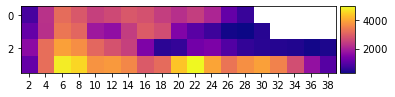

In [59]:

total = []
for key, data  in Neurites_dict.items():
    
    data_list = data['Total'].to_list()
    total.append(data_list)
    print(data['Window_end'])
max_tot = max( [max(subl) for subl in total])
max_len = max( [len(subl) for subl in total])

for row in total:

    while len(row) < max_len:

        row.append(None)


array_totals = np.array(total)
array_totals = array_totals.astype(np.float)

fig, ax = plt.subplots()
im = ax.imshow(array_totals, cmap="plasma", vmax =max_tot)
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax, orientation='vertical')  

x_values=np.arange(0, float(data['Window_end'][-1]/1000), 2, dtype=int)
print(x_values)
ax.locator_params(axis='x', nbins=max_len)
    
#ax.set_xticklabels(np.arange(0, float(data['Window_end'][-1]/1000), 2, dtype=int))
ax.set_xticklabels(x_values)
plt.show()

14
15
19
19
<class 'numpy.ndarray'>
[ 0  2  4  6  8 10 12 14 16 18 20 22 24 26 28]


<ipython-input-18-5484a9fcb13b>:18: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = y.astype(np.float)
<ipython-input-18-5484a9fcb13b>:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_values)


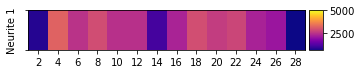

<class 'numpy.ndarray'>
[ 0  2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32]


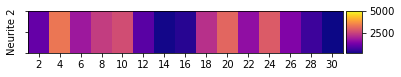

<class 'numpy.ndarray'>
[ 0  2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36]


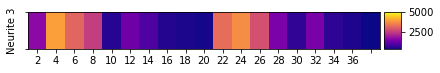

<class 'numpy.ndarray'>
[ 0  2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36]


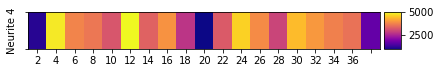

In [18]:






%matplotlib inline
for key, data  in Neurites_dict.items():
    end = float(data['Window_end'][-1]/1000)
    x = np.arange(0,len(data['Total'].values))
    #x = np.arange(-4,4)
    extent = [x[0]-(x[1]-x[0])/2., x[-1]+(x[1]-x[0])/2.,0,2]
    
    x_values = round((data['Window_end'] - (data['Window_end'] - data['Window_start'])/2)/1000, 1).values
    x_values = np.sort(x_values)
    

    y = data['Total'].values
    y = y.astype(np.float)
    print(type(y))
    
    fig, ax = plt.subplots()
    im = ax.imshow(y[np.newaxis,:], extent=extent, cmap="plasma", vmax =max_tot )
    #ax.set_title('Localisation toward the soma, plus in')
    
    ax.set_yticklabels([])
    ax.set_ylabel(f'Neurite {key}')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')  
    x_values=np.arange(0, float(data['Window_end'][-1]/1000), 2, dtype=int)
    print(x_values)
    ax.locator_params(axis='x', nbins=len(y))
    #ax.set_xticklabels(np.arange(0,end, 2, dtype=int))
    
    #ax.set_xticklabels(np.arange(0, float(data['Window_end'][-1]/1000), 2, dtype=int))
    ax.set_xticklabels(x_values)
    plt.savefig(os.getcwd() + fr"\\Neurite_localisationdensity_heatmap_neurite{key}.PNG")
    plt.show()

[17.1 60.7 52.9 44.1 18.0 5.8 0.4 43.3 61.7 52.8 26.3 10.6 3.1 0.01]


TypeError: loop of ufunc does not support argument 0 of type float which has no callable sqrt method

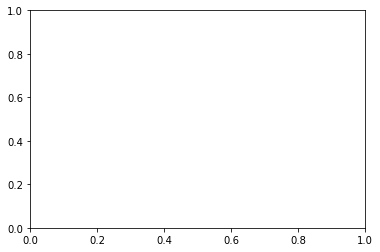

In [155]:
for key, data  in Neurites_dict.items():
    #Plot at middel of window
    #window in micormeters 
    x_values = round((data['Window_end'] - (data['Window_end'] - data['Window_start'])/2)/1000, 1).values
    x_values = np.sort(x_values)
    
    y = data['Plusin']/data['Total']
    a =data['Plusin']/10

    print(a.values)
    plt.scatter(x_values,y, label = key)
    plt.xlabel('Distance along neurite median in micrometer, soma on the left')
    plt.ylabel('Number of localisation toward soma, plus in')
    plt.title(f'Localisation density along neurite, window size {round(window_um, 1)} μm  \n')
plt.legend(title='Neurite')
plt.savefig(os.getcwd() + fr"\\Neurite_localisationdensity_scatter.PNG")
plt.show()

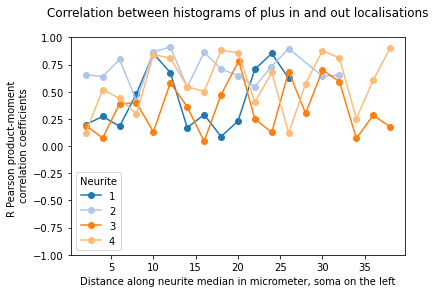

In [123]:
for key, data  in Neurites_dict.items():
    #Plot at middel of window
    #window in micormeters 
    x_values = round((data['Window_end'] - (data['Window_end'] - data['Window_start'])/2)/1000, 1).values
    x_values = np.sort(x_values)
    
    y = data['Corrcov']
    
    plt.plot(x_values,y, '-o', label = key)
    plt.ylim([-1,1])
    plt.xlabel('Distance along neurite median in micrometer, soma on the left')
    plt.ylabel('R Pearson product-moment \n correlation coefficients')
    plt.title("Correlation between histograms of plus in and out localisations\n")
plt.legend(title='Neurite')
plt.savefig(os.getcwd() + fr"\\Neurite_Correlation.PNG")
plt.show()

In [625]:
Neurites_dict[1]
data['x_max_plusin0','x_max_plusin1', 'x_max_plusin2' ]

,Neurite_number,Total,Plusin,Plusout,Projection_min,Projection_max,Max_bin_IN,Max_bin_OUT,Window_start,Window_end,...,x_max_plusout1,y_max_plusout1,x_max_plusin1,y_max_plusin1,x_max_plusin2,y_max_plusin2,x_max_plusout2,y_max_plusout2,x_max_plusin3,y_max_plusin3
Neurite1_window_00,1,805,11,794,1216.407574,2242.140579,4,73,0.000000,3998.707009,...,2102.970774,10.044165,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Neurite1_window_02,1,796,167,629,963.842047,2085.848345,27,71,4006.507016,7999.715092,...,1668.619872,50.452851,1465.643859,6.961019,NaN,NaN,NaN,NaN,NaN,NaN
Neurite1_window_04,1,2723,1213,1510,-26.600612,2248.603474,80,74,8000.365099,11997.615978,...,1871.308324,36.126182,2054.239306,6.146793,NaN,NaN,NaN,NaN,NaN,NaN
Neurite1_window_06,1,3659,1967,1692,122.617839,2801.676540,142,75,12005.523576,15999.009760,...,970.762051,31.612652,1616.967164,98.008828,2074.695787,26.653037,1603.504558,44.588251,NaN,NaN
Neurite1_window_08,1,1680,946,734,374.250948,2748.016196,90,62,16002.259766,19996.519958,...,1507.455464,36.395239,2402.090607,9.776884,NaN,NaN,NaN,NaN,NaN,NaN
Neurite1_window_01,1,708,37,671,1020.089183,2203.072204,9,57,2000.937527,5988.933596,...,1781.002885,36.463155,1679.944034,1.023503,NaN,NaN,2036.622332,11.929493,NaN,NaN
Neurite1_window_03,1,1787,633,1154,96.767511,2063.356132,56,120,6000.651644,9998.555992,...,1677.944292,42.433690,1243.120677,32.120053,NaN,NaN,NaN,NaN,NaN,NaN
Neurite1_window_05,1,3220,1735,1485,-15.967264,2311.916142,158,68,10001.805998,13997.721639,...,849.677822,26.645406,1118.729673,38.325130,1574.948028,100.624121,1867.395692,25.164632,1949.281038,29.825809
Neurite1_window_07,1,3107,1823,1284,654.462402,3213.359042,180,104,14000.321645,17995.911594,...,1837.469893,59.867853,1760.317231,100.344027,2789.019398,20.838466,2493.267525,0.897478,NaN,NaN
Neurite1_window_09,1,1029,337,692,954.356845,2105.617448,43,95,18005.218184,21999.902892,...,1457.671782,71.453900,1677.510490,25.249979,2053.550386,6.911091,NaN,NaN,NaN,NaN


In [42]:
df_stats


NameError: name 'df_stats' is not defined

In [32]:
for keys, data in p.stored_window.items(): 
    print(keys)

Neurite3_window_00
Neurite3_window_02
Neurite3_window_04
Neurite3_window_06
Neurite3_window_08
Neurite3_window_10
Neurite3_window_12
Neurite3_window_14
Neurite3_window_16
Neurite3_window_18
Neurite3_window_01
Neurite3_window_03
Neurite3_window_05
Neurite3_window_07
Neurite3_window_09
Neurite3_window_11
Neurite3_window_13
Neurite3_window_15


In [54]:
##Creates a data frame with statitics for each window for each neurite from the dictionary
def statitics_per_neurite(nbins=100, bin_width =30):
   
    
    #nbins is number of bins
    df_stats = pd.DataFrame(columns = ['Neurite_number', 'Total', 'Plusin', 'Plusout', 'Projection_min', 'Projection_max', 'Max_bin_IN', 'Max_bin_OUT' ])

    for keys, data in p.stored_window.items(): 


        total  = len(data[0])
        plusin = len(data[0][(data[0]['Plus_IN']==True)])
        plusout = len(data[0][(data[0]['Plus_IN']==False)])
        projection_min = data[0].filter(like='projection_(nm)').min().values[0]
        projection_max = data[0].filter(like='projection_(nm)').max().values[0]

        
        
        #Bin data to get max bin heights, the data is binned for the full length of the projection line!
        binned_data_IN= pd.cut(data[0].filter(like='projection_(nm)')[(data[0]['Plus_IN']==True)].iloc[:,0], bins=np.linspace(0, p.window_width, nbins)).value_counts( sort=False)
        binned_data_OUT= pd.cut(data[0].filter(like='projection_(nm)')[(data[0]['Plus_IN']==False)].iloc[:,0], bins=np.linspace(0, p.window_width, nbins)).value_counts( sort=False)


        neurite_number = re.search(r"Neurite(\d)\w+", keys)
        neurite_number = neurite_number.group(1)
        
        R = np.corrcoef(binned_data_IN, binned_data_OUT)
        print(R[0][1])

        df_row = pd.DataFrame([[neurite_number, total, plusin, plusout, projection_min, projection_max, binned_data_IN.max(), binned_data_OUT.max(), data[1][0], data[1][1], R[0][1]]],\
                              columns = ['Neurite_number','Total', 'Plusin', 'Plusout', 'Projection_min', 'Projection_max', 'Max_bin_IN', 'Max_bin_OUT', 'Window_start', 'Window_end', 'Corrcov' ],\
                             index = [keys] )

        #Gets the kernel densities 
        h = sns.histplot(data = data[0],x=data[0].filter(like='projection_(nm)').iloc[:,0],\
                         hue='Plus_IN', binwidth=bin_width, kde=True).get_lines()
        plt.show() #this is necessary for refressing h?? check? 

        #first line is plusin (if present) secons line is plusout
        # for local maxima, returns the indices only for one for now
        indices_maxs_0 = argrelextrema(h[0].get_data()[1], np.greater)

        maxima = []
        num = 0

        for indx in indices_maxs_0[0]: 
            xmax,ymax = h[0].get_data()[0][indx], h[0].get_data()[1][indx]

            maxima.append(xmax)
            if len(maxima) >= 2: 
                if abs(maxima[-1]-maxima[-2]) < 120: 
                    #Merge maxima closer than certain value (in nm)
                    xmax = (maxima[-1]+maxima[-2])/2

                    absolute_val_array = np.abs(h[0].get_data()[0] - xmax)
                    new_index = absolute_val_array.argmin()
                    xmax,ymax = h[0].get_data()[0][new_index], h[0].get_data()[1][new_index]

                    print(f'{maxima[-1]} and  {maxima[-2]} were merged to {xmax}')
                    del maxima[-2:]
                    maxima.append(xmax)
                    num -=1

            if plusin > 0: 
                df_row[f'x_max_plusin{num}'],df_row[f'y_max_plusin{num}'] = xmax,ymax
            else: 
                df_row[f'x_max_plusout{num}'],df_row[f'y_max_plusout{num}'] = xmax,ymax
            num += 1

        if len(h) == 2:
            indices_maxs_1 = argrelextrema(h[1].get_data()[1], np.greater)

            maxima = []
            num = 0
            for indx in indices_maxs_1[0]: 

                xmax,ymax = h[1].get_data()[0][indx], h[1].get_data()[1][indx]

                maxima.append(xmax)
                if len(maxima) >= 2: 
                    if abs(maxima[-1]-maxima[-2]) < 120: 
                        #Merge maxima closer than certain value (in nm)
                        xmax = (maxima[-1]+maxima[-2])/2
                        absolute_val_array = np.abs(h[1].get_data()[0] - xmax)
                        new_index = absolute_val_array.argmin()
                        xmax,ymax = h[1].get_data()[0][new_index], h[1].get_data()[1][new_index]
                        print(f'{maxima[-1]} and  {maxima[-2]} were merged to {xmax}')
                        del maxima[-2:]
                        maxima.append(xmax)
                        num -=1

                if plusout > 0: 
                    df_row[f'x_max_plusout{num}'],df_row[f'y_max_plusout{num}'] = xmax,ymax
                else: 
                    print('ERROR the first kde is assigned to plusin if it is not zero so the second should be plusout, but this is zero')

                num += 1


        #Put all the info in a dataframe with key as index
        
        df_stats = df_stats.append(df_row)
        
    df_stats = df_stats.sort_index()
    return df_stats
    
    

    


In [107]:
def plot_heat_maps(keys, data, df_stats, bin_width =30, store_fig=False): 
        #binwidth in nm
       
        
        #Get global statistics for this neurite from data frame
        neurite_number = re.search(r"Neurite(\d)\w+", keys)
        neurite_number = neurite_number.group(1)
        
        heighest_bin= df_stats[(df_stats['Neurite_number']==neurite_number)][['Max_bin_IN', 'Max_bin_OUT']].max().max()
        
        #get x limits
        x_lower = df_stats[(df_stats['Neurite_number']==neurite_number)]['Projection_min'].min()
        x_upper = df_stats[(df_stats['Neurite_number']==neurite_number)]['Projection_max'].max()
        
        nbins = int(round((x_upper-x_lower)/bin_width, 1))
        
        ##########
        
        start, end = data[1][0], data[1][1]

        x = np.linspace(-3,3)
        extent = [x[0]-(x[1]-x[0])/2., x[-1]+(x[1]-x[0])/2.,0,1.5]
        

        binned_data_IN= pd.cut(data[0].filter(like='projection_(nm)')[(data[0]['Plus_IN']==True)].iloc[:,0], bins=np.linspace(x_lower, x_upper, nbins)).value_counts( sort=False)
        binned_data_OUT= pd.cut(data[0].filter(like='projection_(nm)')[(data[0]['Plus_IN']==False)].iloc[:,0], bins=np.linspace(x_lower, x_upper, nbins)).value_counts( sort=False)
        
        
        fig, (ax, ax1) = plt.subplots(2, sharex=True)
        im = ax.imshow([binned_data_IN.values], extent=extent, cmap="RdPu", vmin=0, vmax=heighest_bin)
        ax.set_title('Localisation toward the soma, plus in')
        #color bar
        divider = make_axes_locatable(ax)
        cax = divider.append_axes('right', size='5%', pad=0.05)
        fig.colorbar(im, cax=cax, orientation='vertical')
       
        ax.set_xticks(np.linspace(-3,3, 9))
        ax.set_yticklabels([])
        
        
        
        im1 = ax1.imshow([binned_data_OUT.values], extent=extent, cmap="GnBu", vmin=0, vmax=heighest_bin)
        ax1.set_title('Localisation away from the soma, plus out')
        #Color bar
        divider = make_axes_locatable(ax1)
        cax = divider.append_axes('right', size='5%', pad=0.05)
        fig.colorbar(im1, cax=cax, orientation='vertical')
        ax1.set_yticklabels([])
        
        ax1.set_xticklabels(np.linspace(x_lower, x_upper, 9, dtype=int))
        ax1.set_xlabel('Distance along projection line (nm)')
        
        fig.suptitle(f'Distance along neurite median {round(start/1000, 0)}-{round((end/1000), 0)} μm')
        
        if store_fig: 
            name = re.search(r"(Neurite\d)\w+(\d\d)", keys)
            fig.savefig(os.getcwd() + fr"\\{name.group(1)}_projectionmap{name.group(2)}.jpeg")
            
        
    
        plt.show()
        
        


In [94]:
os.getcwd()

'C:\\Users\\Hanna\\Documents\\Master_thesis_data\\2022_02_16_Motor_PAINT_Neurons_DIV2_Analysis_version2\\S03_C02_ROI1\\videos'

In [96]:
def plot_heat_maps_2(keys, data, df_stats, bin_width =30, store_fig=False): 
        #binwidth in nm
       
        
        #Get global statistics for this neurite from data frame
        neurite_number = re.search(r"Neurite(\d)\w+", keys)
        neurite_number = neurite_number.group(1)
        
        heighest_bin= df_stats[(df_stats['Neurite_number']==neurite_number)][['Max_bin_IN', 'Max_bin_OUT']].max().max()
        
        #get x limits
        x_lower = df_stats[(df_stats['Neurite_number']==neurite_number)]['Projection_min'].min()
        x_upper = df_stats[(df_stats['Neurite_number']==neurite_number)]['Projection_max'].max()
        
        nbins = int(round((x_upper-x_lower)/bin_width, 1))
        
        ##########
        
        start, end = data[1][0], data[1][1]

        x = np.linspace(-3,3)
        extent = [x[0]-(x[1]-x[0])/2., x[-1]+(x[1]-x[0])/2.,0,1.]
        

        binned_data_IN= pd.cut(data[0].filter(like='projection_(nm)')[(data[0]['Plus_IN']==True)].iloc[:,0], bins=np.linspace(x_lower, x_upper, nbins)).value_counts( sort=False)
        binned_data_OUT= pd.cut(data[0].filter(like='projection_(nm)')[(data[0]['Plus_IN']==False)].iloc[:,0], bins=np.linspace(x_lower, x_upper, nbins)).value_counts( sort=False)
        
        
        fig, (ax, ax1) = plt.subplots(2, sharex=True)
        im = ax.imshow([binned_data_IN.values], extent=extent, cmap="RdPu", vmin=0, vmax=heighest_bin)
        ax.set_ylabel(f'{round(start/1000, 0)}-{round((end/1000), 0)} μm', rotation=0, labelpad=28)
        #color bar
        divider = make_axes_locatable(ax)
        cax = divider.append_axes('right', size='5%', pad=0.05)
        fig.colorbar(im, cax=cax, orientation='vertical')
       
        #ax.set_xticks(np.linspace(-3,3, 9))
        ax.set_yticklabels([])
        
        
        
        im1 = ax1.imshow([binned_data_OUT.values], extent=extent, cmap="GnBu", vmin=0, vmax=heighest_bin)
        #ax1.set_ylabel('Plus out')
        #Color bar
        divider = make_axes_locatable(ax1)
        cax = divider.append_axes('right', size='5%', pad=0.05)
        fig.colorbar(im1, cax=cax, orientation='vertical')
        ax1.set_yticklabels([])
        
        ax1.set_xticklabels(np.linspace(x_lower, x_upper, 9, dtype=int))
        ax1.set_xlabel('Distance along projection line (nm)')
        
        #fig.suptitle(f'Distance along neurite median {round(start/1000, 0)}-{round((end/1000), 0)} μm')
        
        plt.subplots_adjust(left=0.1,
                    bottom=0.6, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0, 
                    hspace=0)
        #plt.subplot_tool()
        
        if store_fig: 
            name = re.search(r"(Neurite\d)\w+(\d\d)", keys)
            fig.savefig(os.getcwd() + fr"\\PNGs\\{name.group(1)}_projectionmap{name.group(2)}.PNG")
            
        
    
        plt.show()
        
        

In [102]:
def plot_hist(keys, data, df_stats, bin_width =30, store_fig=False): 
        #binwidth in nm
        start, end = data[1][0], data[1][1]
        
        #Get global statistics for this neurite from data frame
        neurite_number = re.search(r"Neurite(\d)\w+", keys)
        neurite_number = neurite_number.group(1)
        
        heighest_bin = df_stats[(df_stats['Neurite_number']==neurite_number)][['Max_bin_IN', 'Max_bin_OUT']].max().max()
        
        #get x limits
        x_lower = df_stats[(df_stats['Neurite_number']==neurite_number)]['Projection_min'].min()
        x_upper = df_stats[(df_stats['Neurite_number']==neurite_number)]['Projection_max'].max()

    
    
    ####PLOT HISTOGRAM
        palette ={True: "orchid", False: "darkturquoise"}
        sns.histplot(data = data[0],x=data[0].filter(like='projection_(nm)').iloc[:,0],\
                         hue='Plus_IN', binwidth=bin_width, kde=True, palette = palette)
        plt.ylabel('Number of localisations')
        plt.xlabel('Distance along projection line (nm)')
        plt.xlim( x_lower, x_upper )
        
        plt.ylim(0,heighest_bin)
        plt.title(f'Distance along neurite median {round(start/1000, 0)}-{round((end/1000), 0)} μm')
        
        if store_fig: 
            name = re.search(r"(Neurite\d)\w+(\d\d)", keys)
            plt.savefig(os.getcwd() + fr"\\{name.group(1)}_projectionhist{name.group(2)}.jpeg")
        
        plt.show()

In [100]:


def get_concat_h(im1, im2):
    dst = Image.new('RGB', (im1.width + im2.width, im1.height))
    dst.paste(im1, (0, 0))
    dst.paste(im2, (im1.width, 0))
    return dst

def get_concat_v(im1, im2):
    dst = Image.new('RGB', (im1.width, im1.height + im2.height))
    dst.paste(im1, (0, 0))
    dst.paste(im2, (0, im1.height))
    return dst

#get_concat_h(im1, im1).save('data/dst/pillow_concat_h.jpg')

In [117]:

plottype='map' # 'map' or 'hist'
for i in range(1,neuron_mdf.Neurite_label.max()+1):
    img_array = []
    files_projection = []
    files_window = []
    
    
    for filename in glob.glob(f"Neurite{i}_window*.jpeg"):
        files_window.append(filename)
    files_window.sort()
    print(files_window)
    for filename in glob.glob(f"Neurite{i}_projection{plottype}*.jpeg"):
        files_projection.append(filename)
    files_projection.sort()
    print(files_projection)
   
    for index in range(0, len(files_window)):
        
        im1 = Image.open(files_window[index])
        im2 = Image.open(files_projection[index])
        
        if index<10:
            get_concat_h(im1, im2).save(os.getcwd()+f'\\Neurite{i}_Concat_h0{index}.jpeg')
        else: 
            get_concat_h(im1, im2).save(os.getcwd()+f'\\Neurite{i}_Concat_h{index}.jpeg')
    
    file_list=[]
    for filename in glob.glob(f"Neurite{i}_Concat_h*.jpeg"):
        file_list.append(filename)
    file_list.sort()     
    
    for file in file_list:
        img = cv2.imread(file)
        height, width, layers = img.shape
        size = (width,height)

        img_array.append(img)

   
    out = cv2.VideoWriter(f'Neurite{i}_map.avi',cv2.VideoWriter_fourcc(*"MJPG" ), 1,size)

    for f in range(len(img_array)):
           out.write(img_array[f])
    out.release()
    

['Neurite1_window_00.jpeg', 'Neurite1_window_01.jpeg', 'Neurite1_window_02.jpeg', 'Neurite1_window_03.jpeg', 'Neurite1_window_04.jpeg', 'Neurite1_window_05.jpeg', 'Neurite1_window_06.jpeg', 'Neurite1_window_07.jpeg', 'Neurite1_window_08.jpeg', 'Neurite1_window_09.jpeg', 'Neurite1_window_10.jpeg', 'Neurite1_window_11.jpeg', 'Neurite1_window_12.jpeg', 'Neurite1_window_13.jpeg']
['Neurite1_projectionmap00.jpeg', 'Neurite1_projectionmap01.jpeg', 'Neurite1_projectionmap02.jpeg', 'Neurite1_projectionmap03.jpeg', 'Neurite1_projectionmap04.jpeg', 'Neurite1_projectionmap05.jpeg', 'Neurite1_projectionmap06.jpeg', 'Neurite1_projectionmap07.jpeg', 'Neurite1_projectionmap08.jpeg', 'Neurite1_projectionmap09.jpeg', 'Neurite1_projectionmap10.jpeg', 'Neurite1_projectionmap11.jpeg', 'Neurite1_projectionmap12.jpeg', 'Neurite1_projectionmap13.jpeg']
['Neurite2_window_00.jpeg', 'Neurite2_window_01.jpeg', 'Neurite2_window_02.jpeg', 'Neurite2_window_03.jpeg', 'Neurite2_window_04.jpeg', 'Neurite2_window_05.jp